In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [36]:
data = pd.read_csv("/Users/timreeves/Desktop/Data_Science_Summer/Kaggle/Datasets/Admission_Predict_Ver1.1.csv")

In [37]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [39]:
data = data.drop(["Serial No."], axis = 1)

In [40]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [41]:
data = data.rename(columns = {"Chance of Admit ": "Chance of Admit"})

In [42]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


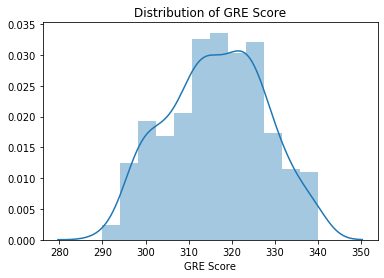

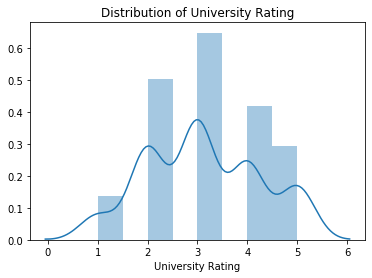

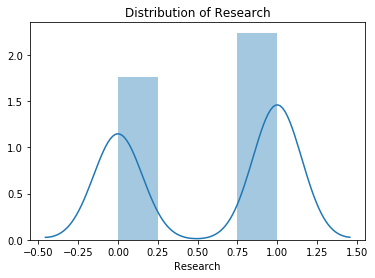

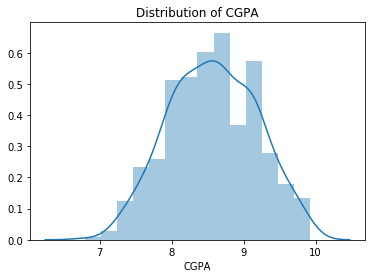

In [75]:
xlist = ["GRE Score", "University Rating", "Research", "CGPA"]
for x in xlist:
    fig = sns.distplot(data[x], kde=True)
    plt.title(f"Distribution of {x}")
    plt.show()

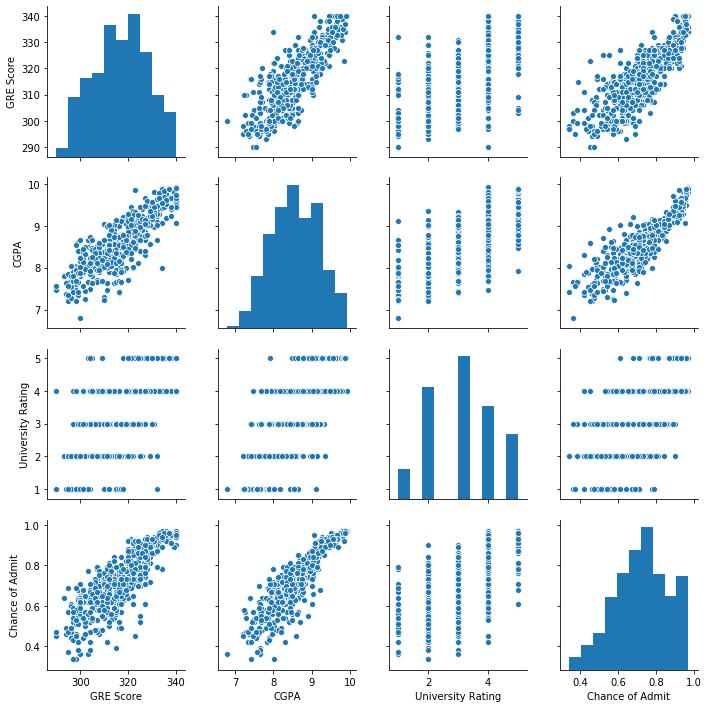

In [45]:
sns.pairplot(data, vars = ["GRE Score", "CGPA", "University Rating", "Chance of Admit"])
plt.show()

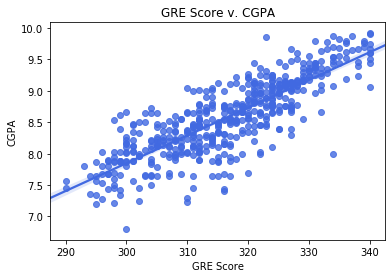

r-squared value: 0.682074394309181


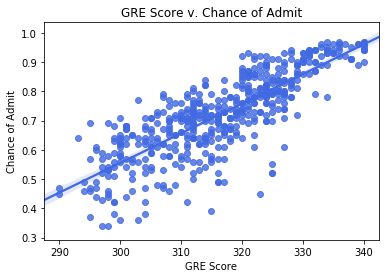

r-squared value: 0.6566681523957087


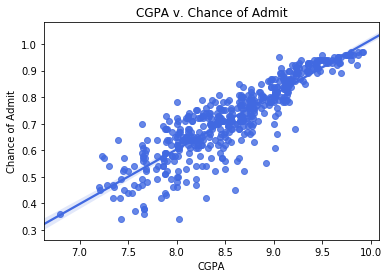

r-squared value: 0.7786519523497211


In [72]:
xlist = ["GRE Score", "GRE Score", "CGPA"]
ylist = ["CGPA", "Chance of Admit", "Chance of Admit"]
for xval,yval in zip(xlist,ylist):
    sns.regplot(x = xval, y = yval, data=data, color = "royalblue", fit_reg=True)
    plt.xlabel(xval)
    plt.ylabel(yval)
    plt.title(f"{xval} v. {yval}")
    plt.show()
    print(f'r-squared value: {stats.pearsonr(data[xval], data[yval])[0] ** 2}')


A few expected trends can be seen in this pair plotting, firstly GRE score and CGPA seem to be strongly positively correlated, where assumingly, students with higher intelligance and work ethic preform better in classes and standarized testing. Secondly, University Rating has an impact on both GRE score and CGPA, where a higher University Rating corrlates to a higher CGPA and GRE score, this make sense as higher caliber students at higher rated university likely preform better. And lastly, both the GRE score and CGPA have large positive correlations to chance of admission.

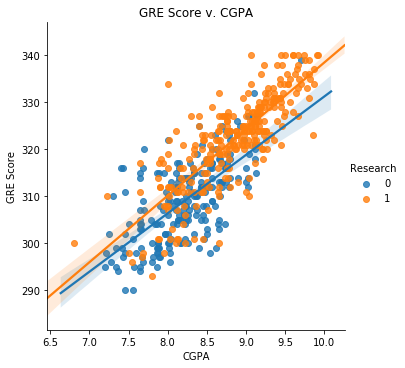

In [82]:
fig = sns.lmplot(x="CGPA", y="GRE Score", data=data, hue="Research")
plt.title("GRE Score v. CGPA")
plt.show()

As shown in this plot, the correlated values for CGPA and GRE Score also seem to have a correlation with Research, where students participating in research tend to have both higher CGPAs and GRE Scores. Because GRE Scores and CGPA are correlated with Chance of Admission, this graph indicates that research could also have a moderate impact on Chance of Admission.

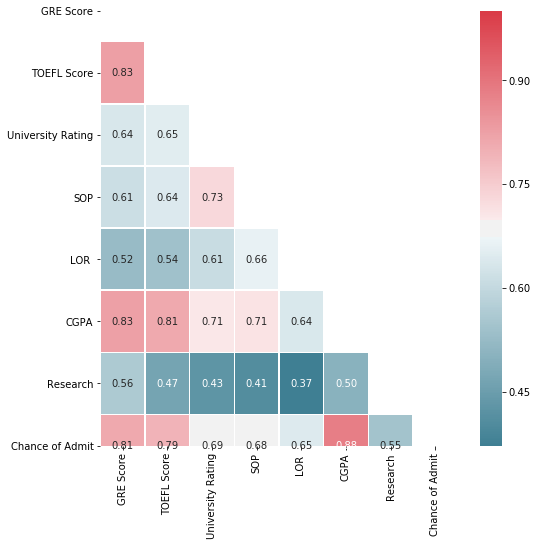

In [87]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [89]:
from sklearn.model_selection import train_test_split

X = data.drop(['Chance of Admit'], axis=1)
y = data['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")
modeldic = {}
for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    modeldic[np.sqrt(mean_squared_error(y_test, predictions))] = name
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
print(f"Best Prefroming models: {modeldic[min(modeldic)]}")


Results...
DecisionTree : 0.0870804225988827
Linear Regression : 0.04293220746251858
RandomForest : 0.05545214152762721
KNeighbours : 0.06980687645210894
SVM : 0.08504061872248211
AdaBoostClassifier : 0.056716187760201056
GradientBoostingClassifier:  0.04712093362104477
Lasso:  0.11488570174881235
Ridge:  0.04289400118357369
BayesianRidge:  0.0428968053533
ElasticNet:  0.08739127414117272
HuberRegressor:  0.057593828304356935
Best Prefroming models: Ridge: 


/Users/timreeves/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/timreeves/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [115]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)


/Users/timreeves/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


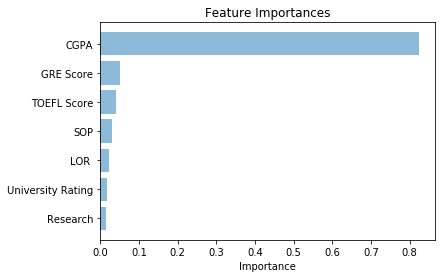

In [116]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

When considering this feature importance graph, it would seem that CGPA is the vastly superior predictor of Chance of Admission, with GRE being a far-away second.

In [118]:
X1 = X.drop(['CGPA'], axis=1)
classifier = RandomForestRegressor()
classifier.fit(X1,y)
feature_names = X1.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X1.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)


/Users/timreeves/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


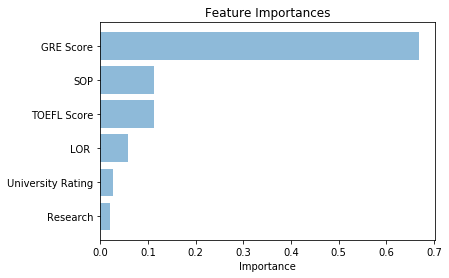

In [119]:
plt.barh([1,2,3,4,5,6], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

However, when CGPA is removed from the analysis, we see that GRE Score similarly takes its massive lead. This indicates a massive multicollinearity between GRE Score and CGPA---which was shown in the earlier correlation graphs. Because these features indicate similar values for predicting Chance of Admission, once one is considered, in this CGPA, GRE Score was ignored. But as CGPA is removed, we can more clearly see the importance of GRE Score.